<a href="https://colab.research.google.com/github/Su66us/Python/blob/master/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando as notas em geral

In [8]:
import pandas as pd



notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
notas.shape

(100836, 4)

In [10]:
notas.columns = ["usuarioId","filmeId", "notas", "momento"]
notas.head()

,usuarioId,filmeId,notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
notas['notas']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: notas, Length: 100836, dtype: float64

In [12]:
notas['notas'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [13]:
notas['notas'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: notas, dtype: int64

In [14]:
notas['notas'].mean()

3.501556983616962

In [15]:
notas.notas.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: notas, dtype: float64

<Axes: >

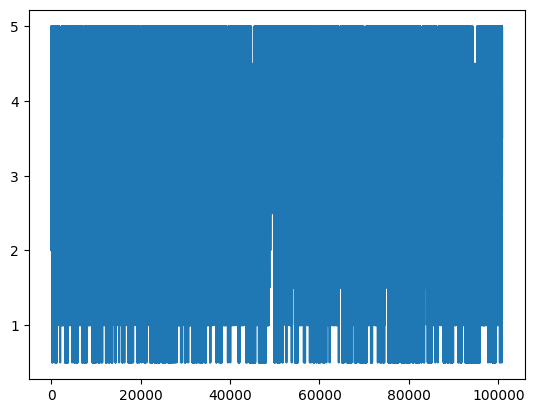

In [16]:
notas.notas.plot()

<Axes: ylabel='Frequency'>

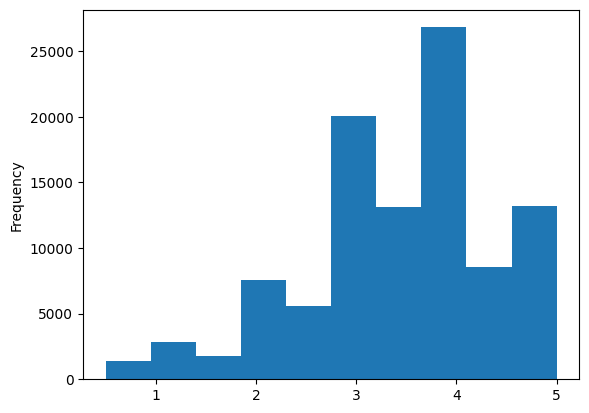

In [17]:
notas.notas.plot(kind = 'hist')

In [18]:
print("media",notas['notas'].mean())
print("mediana",notas['notas'].median())

media 3.501556983616962
mediana 3.5


In [19]:
notas.notas.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: notas, dtype: float64

<Axes: >

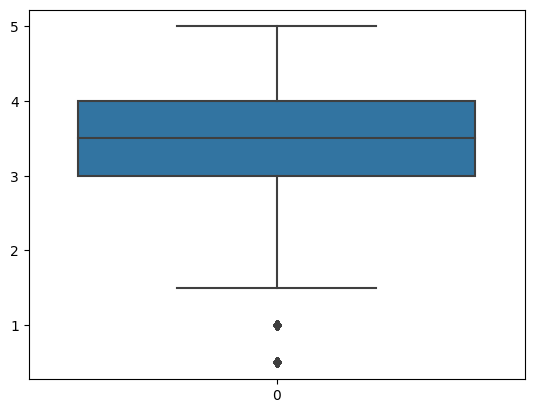

In [20]:
sns.boxplot(notas.notas)

# Olhando os Filmes

In [21]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId","titulo","genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
notas.head()

,usuarioId,filmeId,notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [23]:
notas.query('filmeId == 1').notas

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: notas, Length: 215, dtype: float64

#Analisando Algumas notas especificas por filme

In [24]:
notas.query('filmeId == 1').notas.mean()

3.9209302325581397

In [25]:
notas.query('filmeId == 2').notas.mean()

3.4318181818181817

In [26]:
notas.groupby("filmeId").mean()["notas"]

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: notas, Length: 9724, dtype: float64

In [27]:
notas.groupby("filmeId").mean()["notas"].round()

filmeId
1         4.0
2         3.0
3         3.0
4         2.0
5         3.0
         ... 
193581    4.0
193583    4.0
193585    4.0
193587    4.0
193609    4.0
Name: notas, Length: 9724, dtype: float64

In [28]:
medias_por_filme = notas.groupby("filmeId").mean().notas.round()
medias_por_filme.head()

filmeId
1    4.0
2    3.0
3    3.0
4    2.0
5    3.0
Name: notas, dtype: float64

In [33]:
medias_por_filme = notas.groupby("filmeId").mean().notas
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: notas, dtype: float64

<Axes: ylabel='Frequency'>

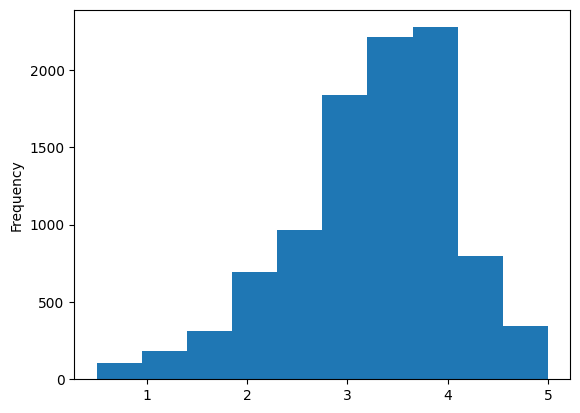

In [34]:
medias_por_filme.plot(kind='hist')

<Axes: >

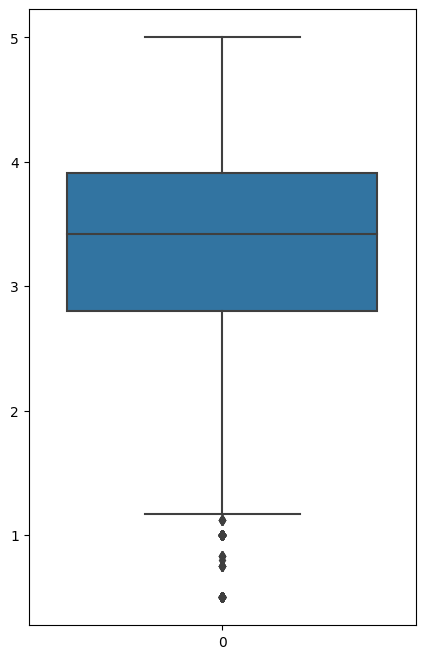

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))

sns.boxplot([medias_por_filme])

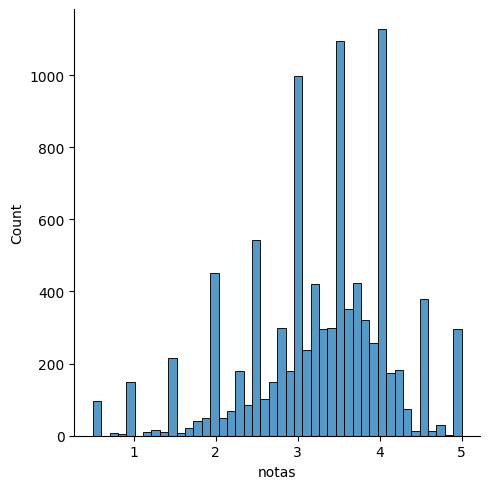

In [45]:
sns.displot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

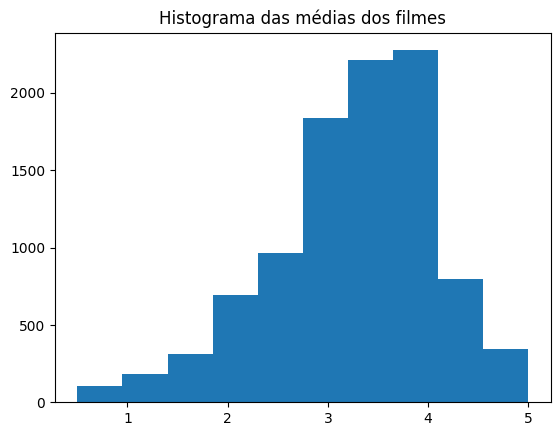

In [48]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")